# Geodesics work:

1) at the paper of Diego we saw that:

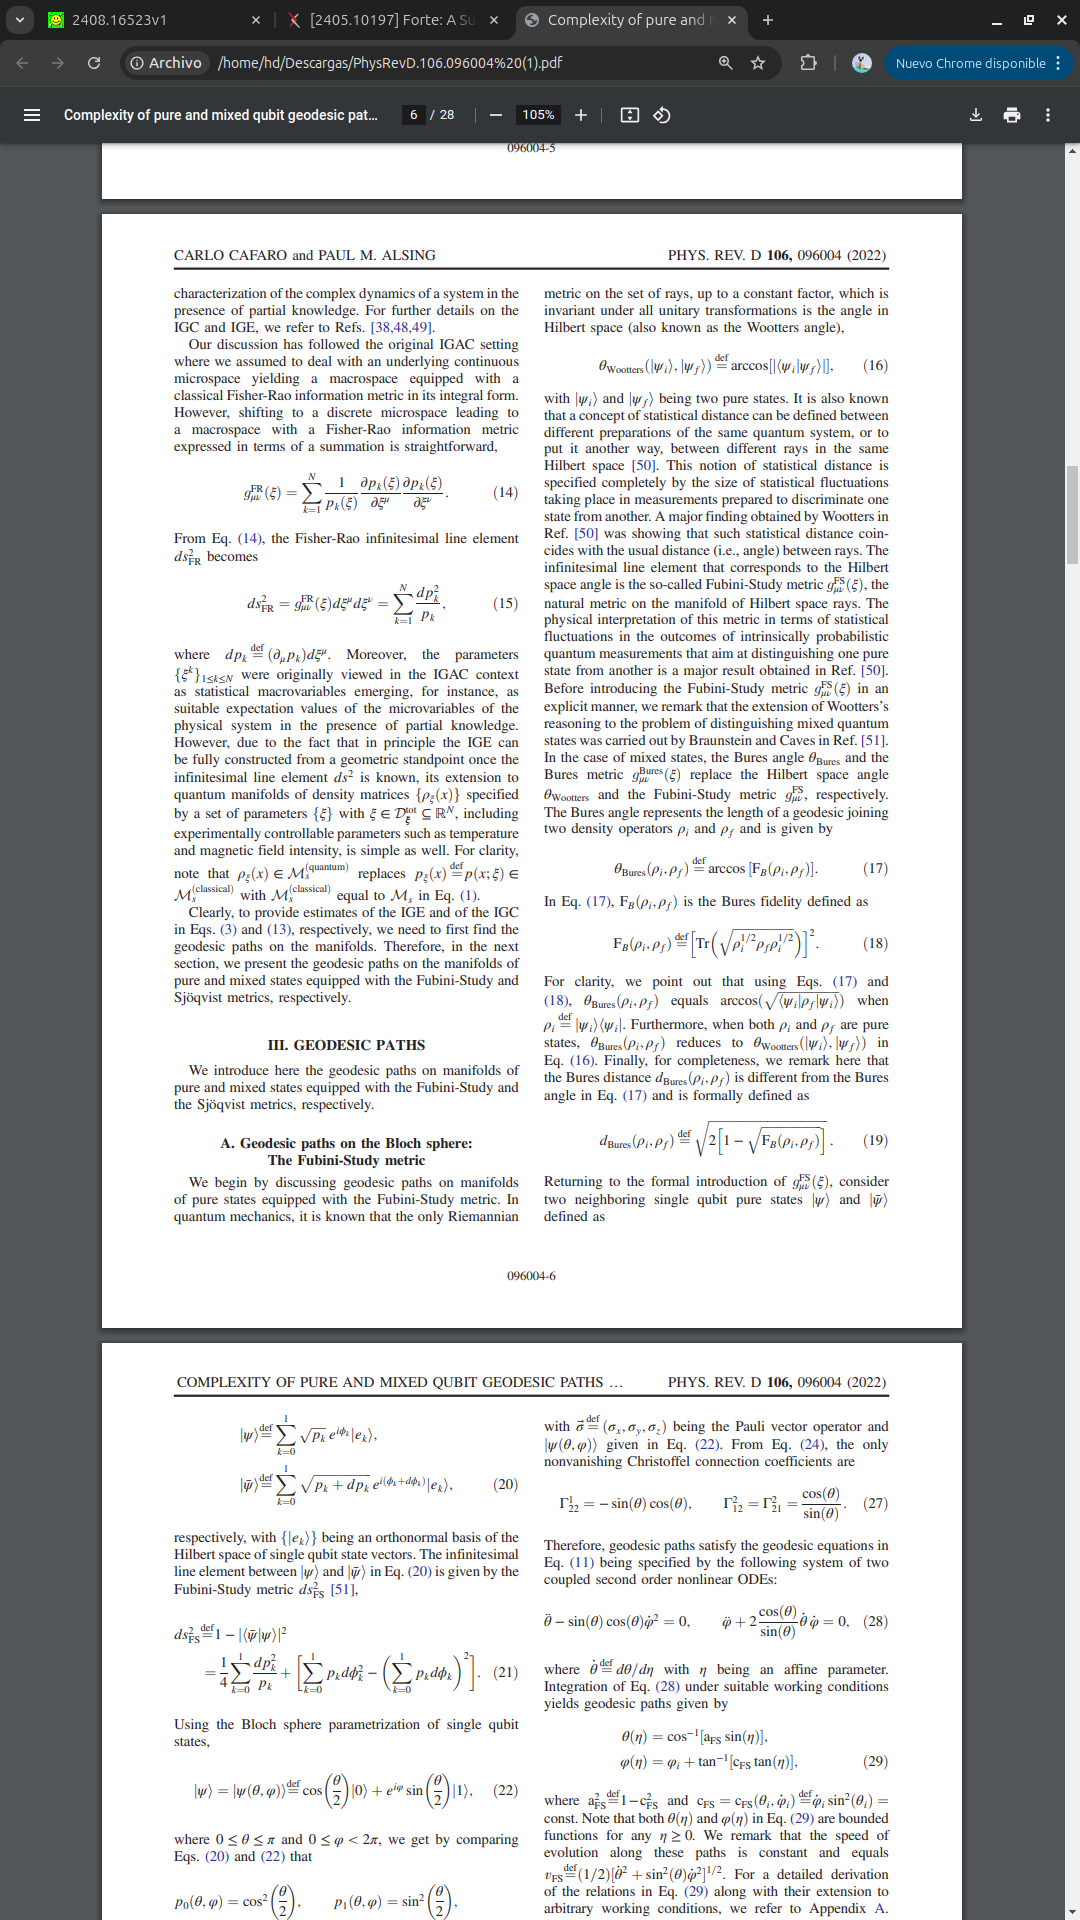

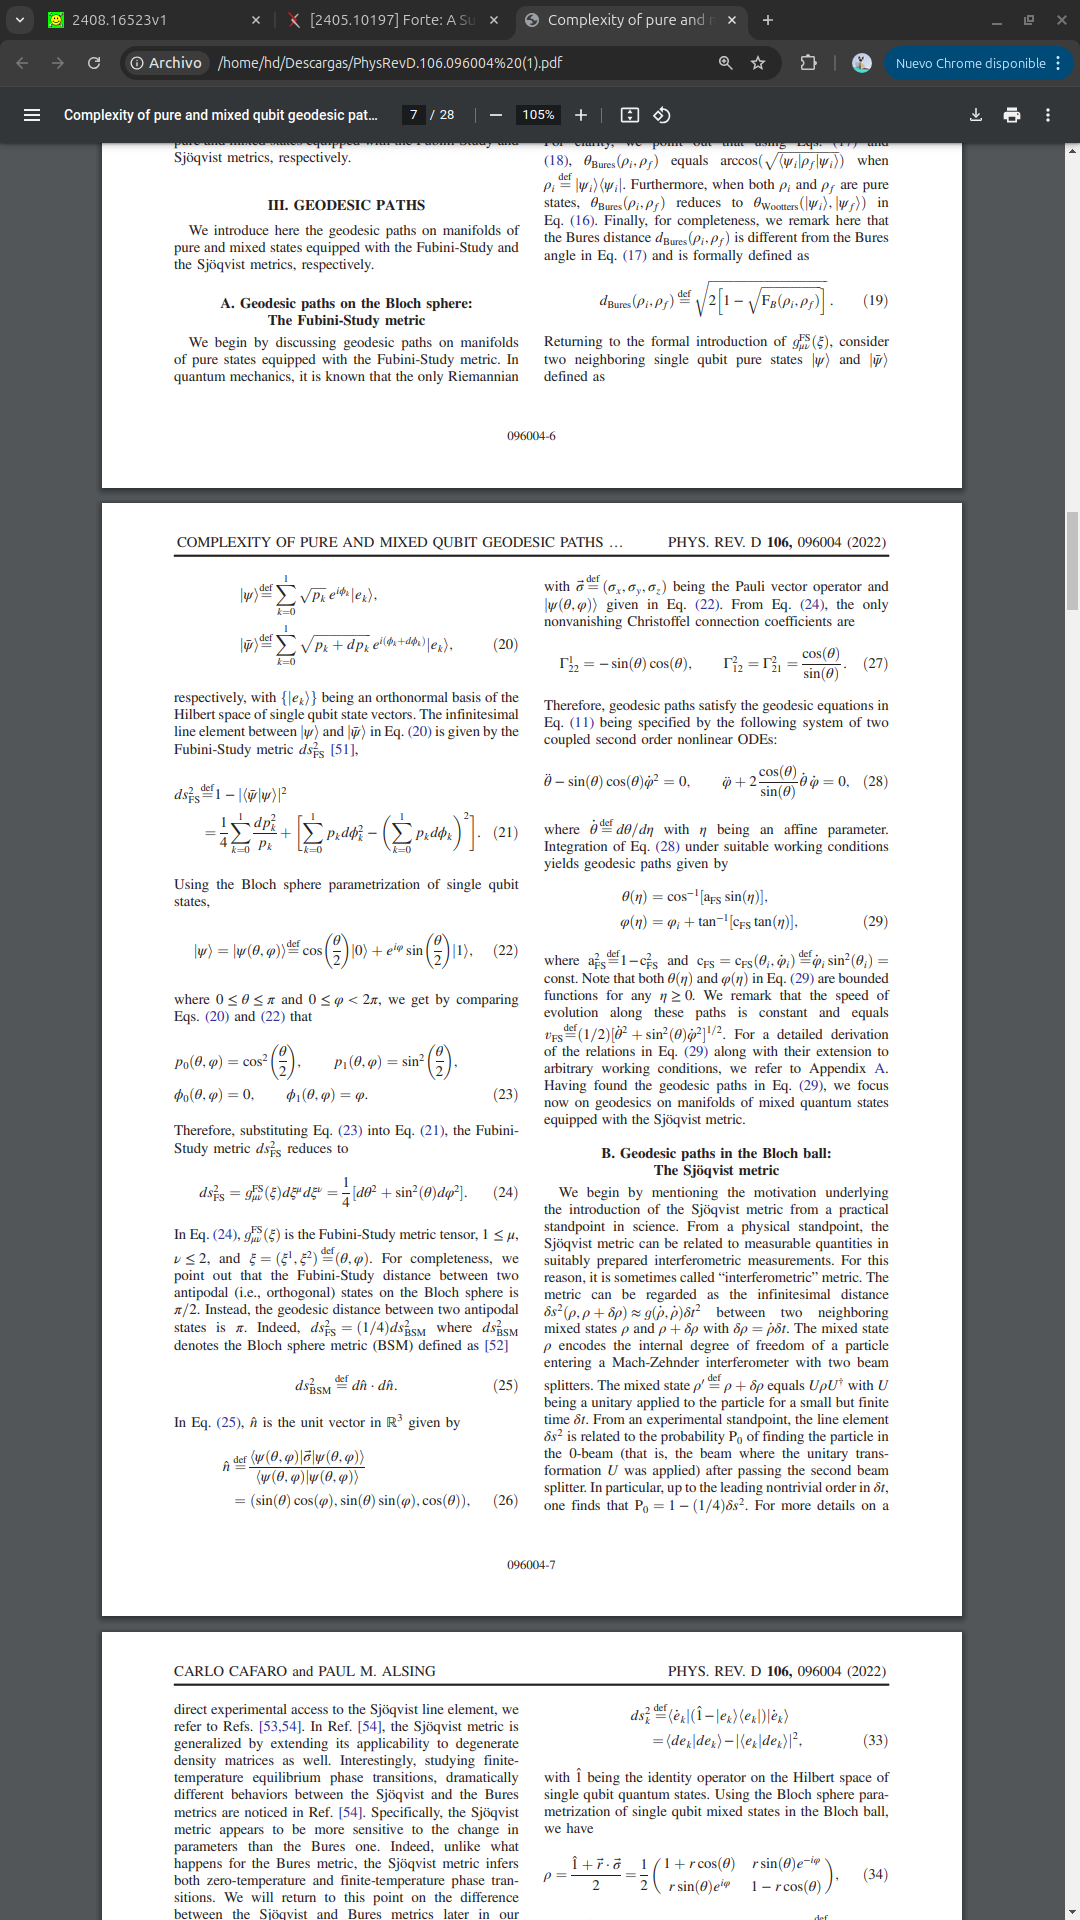


So for 1 qubit, the parametrization of the angle is given by:

$$
\theta( \eta) = \arccos( a_{\text{FS}} \sin( \eta) ) \\
\phi( \eta) = \phi_i + \arctan(c_{\text{FS}} \tan (\eta) )
$$

Lets apply this for 2 concrete examples:

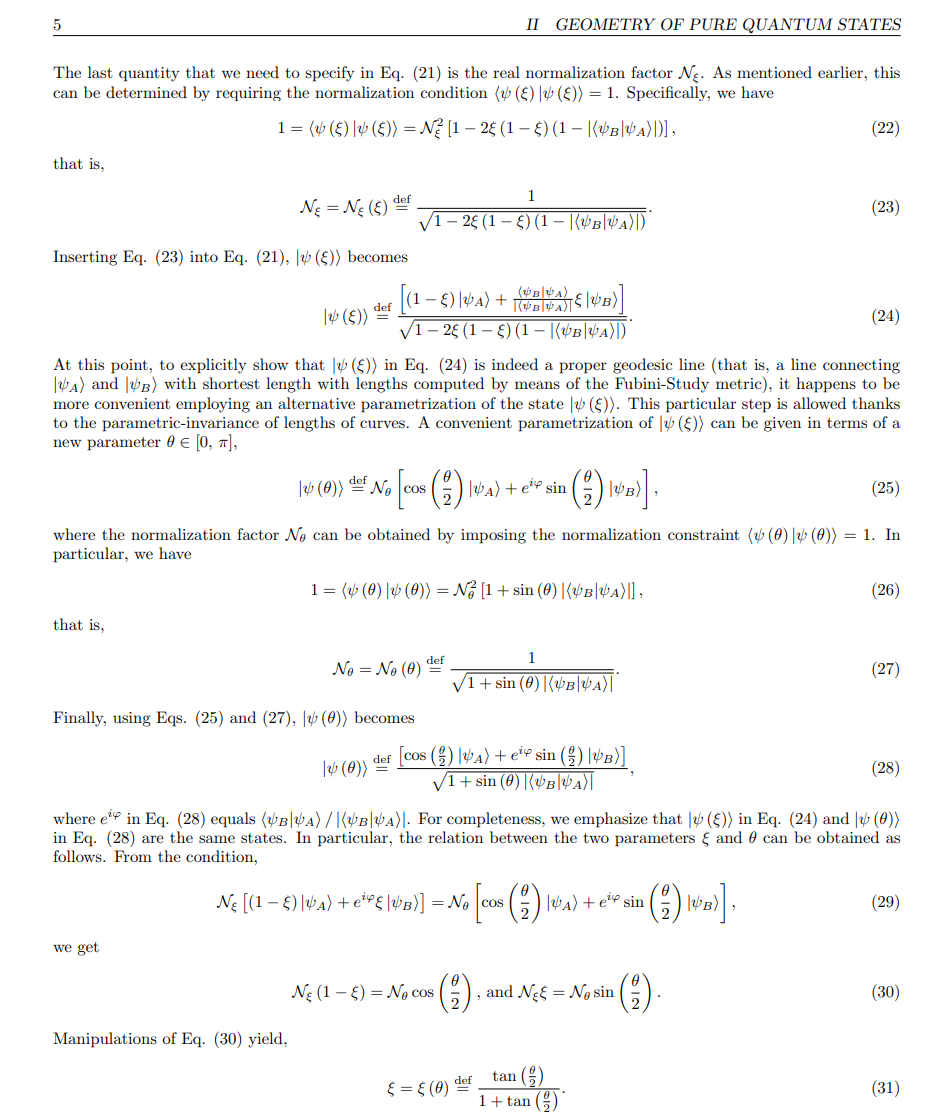

In [18]:
import numpy as np


psi_A = np.array([1, 0]) # |0> state
psi_B = np.array([1, 1]) / np.sqrt(2) # |+> state

#for 1 qubit case: interesting because it can be visualized lol
def quantum_geodesic(psi_a, psi_b, zeta):
    
    psi_b_bra = psi_b.conj().T

    braket_psi_ab = psi_b_bra @ psi_a # <psi_b|psi_a>
    abs_braket_ab = np.abs(braket_psi_ab)


    def norm_parameter(zeta):
        return 1 / np.sqrt(1 - 2 * zeta * (1 - zeta) * (1 - abs_braket_ab))

    psi_zeta = norm_parameter(zeta) * (1 - zeta) * psi_a + (braket_psi_ab / abs_braket_ab) * zeta * psi_b

    return psi_zeta






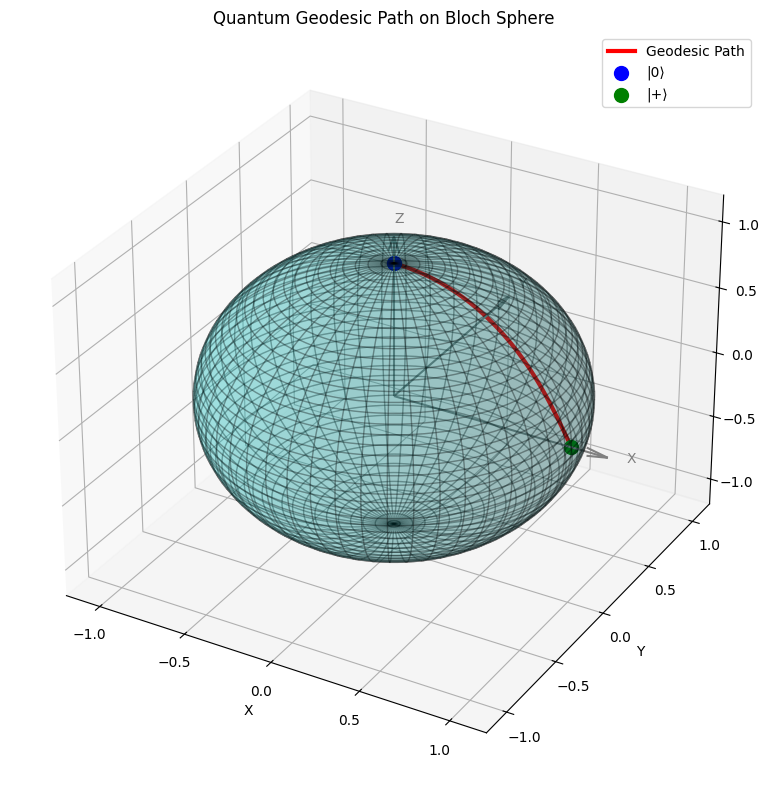

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact

%matplotlib inline

# Pauli matrices
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])

# Vector states
psi_A = np.array([1, 0]) # |0> state
psi_B = np.array([1, 1]) / np.sqrt(2) # |+> state

# Quantum geodesic
def quantum_geodesic(psi_a, psi_b, zeta):
    psi_b_bra = psi_b.conj().T
    braket_psi_ab = psi_b_bra @ psi_a
    abs_braket_ab = np.abs(braket_psi_ab)

    def norm_parameter(zeta):
        return 1 / np.sqrt(1 - 2 * zeta * (1 - zeta) * (1 - abs_braket_ab))

    psi_zeta = norm_parameter(zeta) * (1 - zeta) * psi_a + (braket_psi_ab / abs_braket_ab) * zeta * psi_b
    return psi_zeta

# Compute Bloch sphere coordinates
def bloch_coordinates(state):
    rho = np.outer(state, state.conj())  # Density matrix
    x = np.real(np.trace(rho @ X))
    y = np.real(np.trace(rho @ Y))
    z = np.real(np.trace(rho @ Z))
    return np.array([x, y, z])

# Plot the whole geodesic path
def plot_geodesic_path():
    # Define sphere
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))
    
    # Calculate points along the geodesic path
    num_points = 100
    zeta_values = np.linspace(0, 1, num_points)
    geodesic_points = np.zeros((num_points, 3))
    
    for i, zeta in enumerate(zeta_values):
        state = quantum_geodesic(psi_A, psi_B, zeta)
        geodesic_points[i] = bloch_coordinates(state)
    
    # Calculate Bloch coordinates for initial and final states
    bloch_A = bloch_coordinates(psi_A)
    bloch_B = bloch_coordinates(psi_B)
    
    # Create plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the Bloch sphere
    ax.plot_surface(x, y, z, color='c', alpha=0.2, edgecolor='k')
    
    # Plot the geodesic path
    ax.plot(geodesic_points[:, 0], geodesic_points[:, 1], geodesic_points[:, 2], 
            'r-', linewidth=3, label='Geodesic Path')
    
    # Plot the start and end points
    ax.scatter(bloch_A[0], bloch_A[1], bloch_A[2], color='blue', s=100, label='|0⟩')
    ax.scatter(bloch_B[0], bloch_B[1], bloch_B[2], color='green', s=100, label='|+⟩')
    
    # Add coordinate axes
    ax.quiver(0, 0, 0, 1.2, 0, 0, color='gray', arrow_length_ratio=0.1)
    ax.quiver(0, 0, 0, 0, 1.2, 0, color='gray', arrow_length_ratio=0.1)
    ax.quiver(0, 0, 0, 0, 0, 1.2, color='gray', arrow_length_ratio=0.1)
    ax.text(1.3, 0, 0, "X", color='gray')
    ax.text(0, 1.3, 0, "Y", color='gray')
    ax.text(0, 0, 1.3, "Z", color='gray')
    
    # Plot customization
    ax.set_xlim([-1.2, 1.2])
    ax.set_ylim([-1.2, 1.2])
    ax.set_zlim([-1.2, 1.2])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Quantum Geodesic Path on Bloch Sphere')
    ax.legend()
    
    plt.tight_layout()
    plt.show()

# You can keep the interactive version too
def plot_bloch(zeta):
    # Define sphere
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))

    # Calculate points along the geodesic path
    num_points = 100
    zeta_values = np.linspace(0, 1, num_points)
    geodesic_points = np.zeros((num_points, 3))
    
    for i, zeta_val in enumerate(zeta_values):
        state = quantum_geodesic(psi_A, psi_B, zeta_val)
        geodesic_points[i] = bloch_coordinates(state)

    # Compute vector and map to Bloch sphere for current zeta
    vec = quantum_geodesic(psi_A, psi_B, zeta)
    bloch_vec = bloch_coordinates(vec)

    # Plot sphere and vector
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, color='c', alpha=0.2, edgecolor='k')
    
    # Plot the geodesic path
    ax.plot(geodesic_points[:, 0], geodesic_points[:, 1], geodesic_points[:, 2], 
            'r-', linewidth=2, alpha=0.5, label='Geodesic Path')
    
    # Plot the current point
    ax.quiver(0, 0, 0, bloch_vec[0], bloch_vec[1], bloch_vec[2], color='r', linewidth=2)
    ax.scatter(bloch_vec[0], bloch_vec[1], bloch_vec[2], color='red', s=100)

    # Plot customization
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Bloch Vector at ζ = {zeta:.2f}')
    plt.show()

# Call the function to plot the full geodesic path
plot_geodesic_path()

# You can also keep the interactive slider
# interact(plot_bloch, zeta=(0.0, 1.0, 0.01))

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, interactive, fixed, widgets
from IPython.display import display, clear_output

# Ensure we're using the right backend for Jupyter
%matplotlib inline

# Pauli matrices
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])

# Vector states
psi_A = np.array([1, 0])  # |0> state
psi_B = np.array([1, 1]) / np.sqrt(2)  # |+> state

# Quantum geodesic
def quantum_geodesic(psi_a, psi_b, zeta):
    psi_b_bra = psi_b.conj()
    braket_psi_ab = np.dot(psi_b_bra, psi_a)
    abs_braket_ab = np.abs(braket_psi_ab)

    def norm_parameter(z):
        return 1 / np.sqrt(1 - 2 * z * (1 - z) * (1 - abs_braket_ab))

    norm = norm_parameter(zeta)
    term1 = (1 - zeta) * psi_a
    term2 = (braket_psi_ab / abs_braket_ab) * zeta * psi_b
    psi_zeta = norm * (term1 + term2)
    return psi_zeta

# Compute Bloch sphere coordinates
def bloch_coordinates(state):
    rho = np.outer(state, state.conj())  # Density matrix
    x = np.real(np.trace(np.dot(rho, X)))
    y = np.real(np.trace(np.dot(rho, Y)))
    z = np.real(np.trace(np.dot(rho, Z)))
    return np.array([x, y, z])

# Precompute the geodesic path
def precompute_geodesic():
    num_points = 100
    zeta_values = np.linspace(0, 1, num_points)
    geodesic_points = np.zeros((num_points, 3))
    
    for i, zeta in enumerate(zeta_values):
        state = quantum_geodesic(psi_A, psi_B, zeta)
        geodesic_points[i] = bloch_coordinates(state)
    
    return geodesic_points

# Enhanced interactive plotting function
def interactive_bloch_sphere(zeta, geodesic_points):
    # Clear previous output for smoother updates
    clear_output(wait=True)
    
    # Define sphere
    u = np.linspace(0, 2 * np.pi, 50)
    v = np.linspace(0, np.pi, 50)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))
    
    # Compute current state and its Bloch vector
    current_state = quantum_geodesic(psi_A, psi_B, zeta)
    current_coords = bloch_coordinates(current_state)
    
    # Create figure with subplots - one for 3D, one for state info
    fig = plt.figure(figsize=(15, 7))
    
    # 3D Plot
    ax = fig.add_subplot(121, projection='3d')
    
    # Plot Bloch sphere
    ax.plot_surface(x, y, z, color='lightblue', alpha=0.2, edgecolor='gray', linewidth=0.1)
    
    # Plot coordinate axes
    ax.quiver(0, 0, 0, 1.2, 0, 0, color='gray', arrow_length_ratio=0.1, alpha=0.7)
    ax.quiver(0, 0, 0, 0, 1.2, 0, color='gray', arrow_length_ratio=0.1, alpha=0.7)
    ax.quiver(0, 0, 0, 0, 0, 1.2, color='gray', arrow_length_ratio=0.1, alpha=0.7)
    ax.text(1.3, 0, 0, "X", color='gray')
    ax.text(0, 1.3, 0, "Y", color='gray')
    ax.text(0, 0, 1.3, "Z", color='gray')
    
    # Plot the geodesic path
    ax.plot(geodesic_points[:, 0], geodesic_points[:, 1], geodesic_points[:, 2], 
            'r-', linewidth=2, alpha=0.7, label='Geodesic Path')
    
    # Plot initial and final states
    bloch_A = bloch_coordinates(psi_A)
    bloch_B = bloch_coordinates(psi_B)
    
    ax.scatter(bloch_A[0], bloch_A[1], bloch_A[2], color='blue', s=100, label='|0⟩')
    ax.scatter(bloch_B[0], bloch_B[1], bloch_B[2], color='green', s=100, label='|+⟩')
    
    # Plot current state
    ax.quiver(0, 0, 0, current_coords[0], current_coords[1], current_coords[2], 
              color='purple', linewidth=3, arrow_length_ratio=0.1)
    ax.scatter(current_coords[0], current_coords[1], current_coords[2], 
               color='magenta', s=150, label=f'ζ={zeta:.2f}')
    
    # Plot customization
    ax.set_xlim([-1.2, 1.2])
    ax.set_ylim([-1.2, 1.2])
    ax.set_zlim([-1.2, 1.2])
    ax.set_xlabel('X', fontsize=12)
    ax.set_ylabel('Y', fontsize=12)
    ax.set_zlabel('Z', fontsize=12)
    ax.set_title('Quantum Geodesic on Bloch Sphere', fontsize=14)
    ax.legend(loc='upper right')
    
    # State information panel
    ax2 = fig.add_subplot(122)
    ax2.axis('off')
    
    # Display state information as text
    info_text = [
        f"Parameter: ζ = {zeta:.3f}",
        f"\nCurrent State Vector:",
        f"|ψ⟩ = [{current_state[0]:.4f}, {current_state[1]:.4f}]",
        f"\nBloch Vector Coordinates:",
        f"x = {current_coords[0]:.4f}",
        f"y = {current_coords[1]:.4f}",
        f"z = {current_coords[2]:.4f}",
        f"\nInitial State (blue): |0⟩ = [1, 0]",
        f"Final State (green): |+⟩ = [1/√2, 1/√2]",
        f"\nDistance from |0⟩: {np.linalg.norm(current_coords - bloch_A):.4f}",
        f"Distance from |+⟩: {np.linalg.norm(current_coords - bloch_B):.4f}",
        f"\nNormalization: |ψ|² = {np.abs(np.vdot(current_state, current_state)):.4f}"
    ]
    
    ax2.text(0.1, 0.5, '\n'.join(info_text), fontsize=12, 
             bbox=dict(facecolor='lightyellow', alpha=0.5))
    
    plt.tight_layout()
    plt.show()

# Precompute the geodesic path once
precomputed_geodesic = precompute_geodesic()

# Create a more refined interactive widget
slider = widgets.FloatSlider(
    value=0.0,
    min=0.0,
    max=1.0,
    step=0.01,
    description='ζ:',
    continuous_update=False,  # Only update when slider is released for better performance
    layout=widgets.Layout(width='80%')
)

# Create a speed control slider
speed_slider = widgets.FloatSlider(
    value=0.5,
    min=0.1,
    max=2.0,
    step=0.1,
    description='Speed:',
    continuous_update=True,
    layout=widgets.Layout(width='50%')
)

# Create a play button with much slower default speed
play_button = widgets.Play(
    value=0,
    min=0,
    max=100,
    step=1,
    interval=500,  # Much slower: 500 milliseconds between frames (twice as slow)
    description="Animate",
    disabled=False
)

# Function to update play button speed
def update_speed(change):
    # Convert speed slider value to interval in milliseconds
    # Lower value = longer interval = slower animation
    # Higher value = shorter interval = faster animation
    new_interval = int(1000 / change['new'])  # 1000ms divided by speed factor
    play_button.interval = new_interval
    
speed_slider.observe(update_speed, names='value')

# Link the play button to the slider
widgets.jslink((play_button, 'value'), (slider, 'value'))

# Create the interactive output
out = widgets.interactive_output(
    interactive_bloch_sphere, 
    {'zeta': slider, 'geodesic_points': fixed(precomputed_geodesic)}
)

# Display controls and output
controls = widgets.VBox([
    widgets.HBox([slider, play_button]),
    widgets.HBox([speed_slider, widgets.Label('← Slower | Faster →')])
])
display(controls)
display(out)

Output()

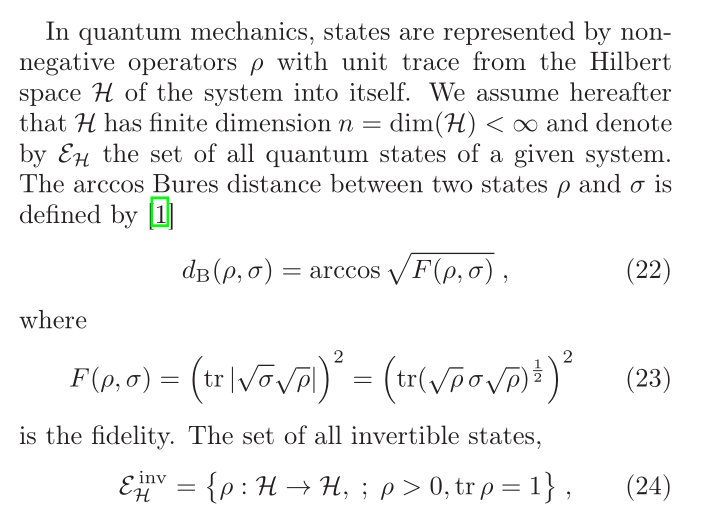

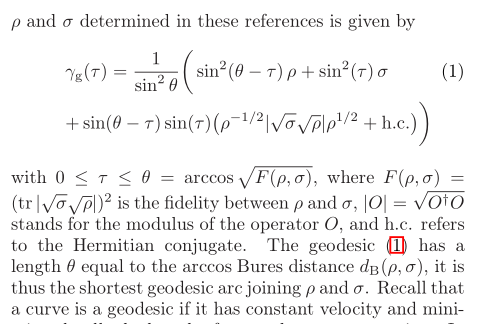

In [21]:
from qiskit.quantum_info import DensityMatrix, state_fidelity
import numpy as np


"""
def sqrt_pd_matrix(A : np.array) -> np.array:
   # Square root of positive definite matrix using eigendecomposition
    evals, evecs = np.linalg.eigh(A)
    #spectral theorem
    return sum( [ np.emath.sqrt(eigval) * np.outer(eigvec, np.conj(eigvec.T)) for eigval, eigvec in zip(evals, evecs) ] )
"""


def sqrt_pd_matrix(A : np.array) -> np.array:
    evals, evecs = np.linalg.eigh(A)
    return evecs @ np.diag(np.sqrt(np.maximum(evals, 1e-10))) @ evecs.T


def bures_distance(rho : np.array, sigma : np.array) -> float:
    # Compute fidelity between the two states

    rho = DensityMatrix(rho)
    sigma = DensityMatrix(sigma)

    F = state_fidelity(rho, sigma, validate=False)

    # Compute the Bures distance
    return np.arccos(np.sqrt(F))



def geodesic_density_matrix(rho : np.array, sigma :np.array, tau : float) -> np.array:

    #returns the geodesic between two states rho and sigma, given 
    #its density matrix np.array 


    theta_bures = bures_distance(rho, sigma) # theta term

    """
    if abs(theta_bures) < 1e-10:
        return rho if tau < 1e-10 else sigma if abs(tau - theta_bures) < 1e-10 else rho
    """


    sqrt_rho = sqrt_pd_matrix(rho) # √ρ 
    sqrt_sigma = sqrt_pd_matrix(sigma) # √σ
    
    # Calculate the amplitude term
    sqrt_sigma_rho = sqrt_sigma @ sqrt_rho # √σ√ρ
    abs_term = sqrt_pd_matrix(sqrt_sigma_rho.conj().T @ sqrt_sigma_rho) # |√σ√ρ| = √[( √σ√ρ )^† ( √σ√ρ ) ]

    # Calculate the inverse square root of rho
    inv_sqrt_rho = np.linalg.pinv(sqrt_rho, rcond=1e-10) # √ρ⁻¹
    
    # Calculate the cross-term (without the sin coefficients)
    cross_term = inv_sqrt_rho @ abs_term @ sqrt_rho # √ρ⁻¹ |√σ√ρ| √ρ
    

    # Now apply the formula directly
    sin2_theta = np.sin(theta_bures) ** 2 # sin²(θ)
    sin2_theta_minus_tau = np.sin(theta_bures - tau) ** 2 # sin²(θ - τ)
    sin2_tau = np.sin(tau) ** 2 # sin²(τ)
    sin_theta_minus_tau_sin_tau = np.sin(theta_bures - tau) * np.sin(tau) # sin(θ - τ) sin(τ)
    
    # First two terms
    result = (1 / sin2_theta) * (sin2_theta_minus_tau * rho + sin2_tau * sigma) # (sin²(θ - τ) ρ + sin²(τ) σ) / sin²(θ)
    
    # Third term + its Hermitian conjugate
    third_term = sin_theta_minus_tau_sin_tau * cross_term # sin(θ - τ) sin(τ) √ρ⁻¹ |√σ√ρ| √ρ
    result += (1 / sin2_theta) * (third_term + third_term.conj().T)
    
    # Ensure the result is a valid density matrix
    result = (result + result.conj().T) / 2  # Ensure perfect Hermiticity (only for numerical errors)
    return result

#lets try this:

# Pure states
ket_zero = np.array([1, 0, 0, 0])
ket_bell = np.array([1, 0, 0, 1]) / np.sqrt(2)

# Convert to density matrices
matrix_zerozero_state = DensityMatrix(ket_zero).data
matrix_bell_state = DensityMatrix(ket_bell).data

def parametrized_geodesic_zero_to_bell(tau):
    return geodesic_density_matrix(matrix_zerozero_state,
                                   matrix_bell_state,
                                     tau)



In [42]:
import sympy as sp

# Define symbolic variable
t = sp.Symbol('t', real=True)

def symbolic_geodesic_density_matrix(rho, sigma, tau):
    """Computes the symbolic geodesic between rho and sigma."""
    n_decimals = 4

    theta_bures = sp.N( bures_distance(rho, sigma), n_decimals)  # Compute Bures distance symbolically
    
    sqrt_rho = sqrt_pd_matrix(rho)  # √ρ
    sqrt_sigma = sqrt_pd_matrix(sigma)  # √σ
    sqrt_sigma_rho = sqrt_sigma @ sqrt_rho  # √σ√ρ
    abs_term = sqrt_pd_matrix(sqrt_sigma_rho.conj().T @ sqrt_sigma_rho)  # |√σ√ρ|
    inv_sqrt_rho = np.linalg.pinv(sqrt_rho, rcond=1e-10)  # √ρ⁻¹
    
    # Compute the cross-term
    cross_term = inv_sqrt_rho @ abs_term @ sqrt_rho  # √ρ⁻¹ |√σ√ρ| √ρ
    
    # Symbolic expressions
    sin2_theta = sp.sin(theta_bures) ** 2
    sin2_theta_minus_tau = sp.sin(theta_bures - tau) ** 2
    sin2_tau = sp.sin(tau) ** 2
    sin_theta_minus_tau_sin_tau = sp.sin(theta_bures - tau) * sp.sin(tau)

    # Compute the matrix
    result = (1 / sin2_theta) * (sin2_theta_minus_tau * rho + sin2_tau * sigma)
    third_term = sin_theta_minus_tau_sin_tau * cross_term
    result += (1 / sin2_theta) * (third_term + third_term.conj().T)

    # Ensure Hermiticity
    result = (result + result.conj().T) / 2

    return sp.Matrix(result)  # Convert to SymPy matrix for symbolic manipulation

# Compute the symbolic geodesic matrix
symbolic_matrix = symbolic_geodesic_density_matrix(matrix_zerozero_state, matrix_bell_state, t)

# Convert to LaTeX
latex_representation = sp.latex(symbolic_matrix)
print(latex_representation)


\left[\begin{matrix}1.0 \sin^{2}{\left(t \right)} - 2.82842712474619 \sin{\left(t \right)} \sin{\left(t - 0.7854 \right)} + 2.0 \sin^{2}{\left(t - 0.7854 \right)} & 0 & 0 & 1.0 \sin^{2}{\left(t \right)}\\0 & 0 & 0 & 0\\0 & 0 & 0 & 0\\1.0 \sin^{2}{\left(t \right)} & 0 & 0 & 1.0 \sin^{2}{\left(t \right)}\end{matrix}\right]


/tmp/ipykernel_7143/2200954903.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  return sqrtm(A).astype(dtype)


In [43]:
from IPython.display import display, Math
import sympy as sp

# Número de decimales a mostrar
n_decimals = 4

# Compute the symbolic geodesic matrix
symbolic_matrix = symbolic_geodesic_density_matrix(matrix_zerozero_state, matrix_bell_state, t)

# Truncate values
symbolic_matrix_truncated = symbolic_matrix.applyfunc(lambda x: sp.N(x, n_decimals))

# Display truncated symbolic matrix in Jupyter
display(symbolic_matrix_truncated)

# Display truncated LaTeX representation
display(Math(sp.latex(symbolic_matrix_truncated)))



/tmp/ipykernel_7143/2200954903.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  return sqrtm(A).astype(dtype)


Matrix([
[1.0*sin(t)**2 - 2.828*sin(t)*sin(t - 0.7854) + 2.0*sin(t - 0.7854)**2, 0, 0, 1.0*sin(t)**2],
[                                                                    0, 0, 0,             0],
[                                                                    0, 0, 0,             0],
[                                                        1.0*sin(t)**2, 0, 0, 1.0*sin(t)**2]])

<IPython.core.display.Math object>

In [ ]:


parametrized_geodesic_zero_to_bell('t')

/tmp/ipykernel_7143/2200954903.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  rho = rho.astype(dtype)
/tmp/ipykernel_7143/2200954903.py:49: ComplexWarning: Casting complex values to real discards the imaginary part
  sigma = sigma.astype(dtype)


ValueError: could not convert string to float: 't'

In [22]:
np.linalg.eigvals( matrix_bell_state)

array([ 1.00000000e+00+0.j, -8.71576399e-33+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j])

In [23]:
from qiskit.quantum_info import DensityMatrix, state_fidelity
import numpy as np
from scipy.linalg import sqrtm, pinvh

# Use float64 for maximum compatibility and precision
dtype = np.float64

def sqrt_pd_matrix(A: np.ndarray) -> np.ndarray:
    """
    Computes the square root of a positive semi-definite matrix using SciPy.
    """
    A = (A + A.conj().T) / 2  # Ensure Hermiticity
    return sqrtm(A).astype(dtype)

def inv_sqrt_matrix(A: np.ndarray) -> np.ndarray:
    """
    Computes the inverse square root of a positive semi-definite matrix using SciPy.
    """
    A = (A + A.conj().T) / 2  # Ensure Hermiticity
    sqrt_A = sqrtm(A).astype(dtype)

    # Perform the pseudoinverse
    return pinvh(sqrt_A).astype(dtype)


def bures_distance(rho: np.ndarray, sigma: np.ndarray) -> float:
    """
    Computes the Bures distance between two density matrices.
    """
    rho = DensityMatrix(rho)
    sigma = DensityMatrix(sigma)
    F = np.clip(state_fidelity(rho, sigma, validate=False), 0, 1)
    return np.arccos(np.sqrt(F))

def project_to_psd(A: np.ndarray) -> np.ndarray:
    """
    Projects a matrix to the nearest positive semi-definite matrix using eigen decomposition.
    """
    A = (A + A.conj().T) / 2
    evals, evecs = np.linalg.eigh(A)
    evals = np.clip(evals, 0, None)  # Set negative eigenvalues to zero
    return (evecs @ np.diag(evals) @ evecs.conj().T).astype(dtype)

def geodesic_density_matrix(rho: np.ndarray, sigma: np.ndarray, tau: float) -> np.ndarray:
    """
    Computes the geodesic density matrix using the Bures metric.
    """
    rho = rho.astype(dtype)
    sigma = sigma.astype(dtype)
    tau = np.float64(tau)
    
    theta_bures = bures_distance(rho, sigma)
    if np.abs(theta_bures) < 1e-10:
        return rho

    sqrt_rho = sqrt_pd_matrix(rho)
    sqrt_sigma = sqrt_pd_matrix(sigma)
    
    sqrt_sigma_rho = sqrt_sigma @ sqrt_rho
    abs_term = sqrt_pd_matrix(sqrt_sigma_rho.conj().T @ sqrt_sigma_rho)

    inv_sqrt_rho = inv_sqrt_matrix(rho)
    cross_term = inv_sqrt_rho @ abs_term @ sqrt_rho

    # Sine and cosine terms
    sin2_theta = np.sin(theta_bures) ** 2
    sin2_theta_minus_tau = np.sin(theta_bures - tau) ** 2
    sin2_tau = np.sin(tau) ** 2
    sin_theta_minus_tau_sin_tau = np.sin(theta_bures - tau) * np.sin(tau)
    
    # First two terms
    result = (1 / sin2_theta) * (sin2_theta_minus_tau * rho + sin2_tau * sigma)

    # Third term + its Hermitian conjugate
    third_term = sin_theta_minus_tau_sin_tau * cross_term
    result += (1 / sin2_theta) * (third_term + third_term.conj().T)

    # Ensure Hermiticity and positivity
    result = (result + result.conj().T) / 2
    result = project_to_psd(result)
    return result

# Pure states
ket_zero = np.array([1, 0, 0, 0])
ket_bell = np.array([1, 0, 0, 1]) / np.sqrt(2)

# Convert to density matrices
matrix_zerozero_state = DensityMatrix(ket_zero).data
matrix_bell_state = DensityMatrix(ket_bell).data

def parametrized_geodesic_zero_to_bell(tau):
    return geodesic_density_matrix(matrix_zerozero_state, matrix_bell_state, tau)


In [24]:
from qiskit.visualization import plot_state_qsphere
from qiskit.quantum_info import DensityMatrix


theta = bures_distance(matrix_zerozero_state, matrix_bell_state)
tau_values = np.linspace(0, theta, 500) # a "continuos" of values of tau

geodesic_states = [parametrized_geodesic_zero_to_bell(tau) for tau in tau_values]



/tmp/ipykernel_7143/2200954903.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  rho = rho.astype(dtype)
/tmp/ipykernel_7143/2200954903.py:49: ComplexWarning: Casting complex values to real discards the imaginary part
  sigma = sigma.astype(dtype)


In [25]:

def is_pure_state(rho):
    # Check if it's a square matrix
    if rho.shape[0] != rho.shape[1]:
        return False
    
    # Check if trace equals 1 (within numerical precision)
    trace = np.trace(rho)
    if not np.isclose(trace, 1.0):
        return False
    
    # Check purity: Tr(ρ²) = 1 for pure states
    purity = np.trace(rho @ rho)
    
    print(purity)

    # Return True if purity is close to 1 (accounting for numerical error)
    return np.isclose(purity, 1.0)

# Here i check if the sates are puros
#spoiler si lo son 

for rho in geodesic_states:
   print(is_pure_state(rho))



print( 1/np.sin(theta) ** 2)

1.0
True
0.9999950454278541
True
0.9999801820550865
False
0.9999554109126945
False
0.9999207337189532
False
0.9998761528793471
False
0.9998216714864551
False
0.9997572933198247
False
0.9996830228457987
False
0.9995988652173231
False
0.9995048262737192
False
0.999400912540427
False
0.9992871312287235
False
0.9991634902353973
False
0.9990299981424106
False
0.9988866642165194
False
0.9987334984088642
False
0.9985705113545372
False
0.9983977143721166
False
0.9982151194631601
False
0.9980227393116913
False
0.9978205872836368
False
0.9976086774262348
False
0.9973870244674294
False
0.997155643815215
False
0.9969145515569617
False
0.9966637644587136
False
0.9964032999644485
False
0.9961331761953114
False
0.9958534119488238
False
0.9955640266980533
False
0.9952650405907638
False
0.9949564744485234
False
0.994638349765799
False
0.9943106887090052
False
0.9939735141155391
False
0.993626849492766
False
0.9932707190169983
False
0.9929051475324299
False
0.9925301605500374
False
0.9921457842464751
Fa

# Tasks:

## 1) Ver que tanto dista la distancia de la geodesica desde $\ket{00} \to \frac{1}{\sqrt{2}} (\ket{00} + \ket{11}$ desde la geodesica a como se suele preparar con circuitos cuánticos. ✅

## 2) Una vez que entendamos que la forma estandar no es buena, hay que ver cual es el operador que vendría siendo la proyección de la compuerta hadamard sobre la geodesica 

## 3) ver cuanto me puedo alejar del estado incial $\ket{00}$, por la geodésica aplicando solo operaciones locales. (si no se puede, minimizsar la distancia entre la geodesica y operaciones locales aplicadas al $\ket{00}$ )





<IPython.core.display.Latex object>

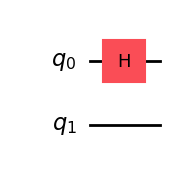

In [26]:
from qiskit.circuit import QuantumCircuit
from qiskit.quantum_info import Statevector

#lets do 1:
qc_h_only = QuantumCircuit(2)
qc_h_only.h(0)

qc_h_only.draw('mpl')
# Get the statevector from the quantum circuit

# Convert the statevector to a density matrix
matrix_pluszero_state = DensityMatrix(qc_h_only).data
DensityMatrix(matrix_pluszero_state).draw('latex')

#DensityMatrix(rho_values[3]).draw('latex')

In [27]:
geodesic_pluszero_distances = [bures_distance(matrix_pluszero_state, sigma) for sigma in geodesic_states]

# Convertir a numpy array solo por optimizar la wuea
arr = np.array(geodesic_pluszero_distances)

# Encontrar el valor máximo, mínimo y sus índices
max_val = np.max(arr)
max_index = np.argmax(arr)

min_val = np.min(arr)
min_index = np.argmin(arr)

print(f"Valor máximo: {max_val}, Índice: {max_index}")
print(f"Valor mínimo: {min_val}, Índice: {min_index}")




Valor máximo: 1.0471975511965979, Índice: 499
Valor mínimo: 0.7853981633974481, Índice: 0


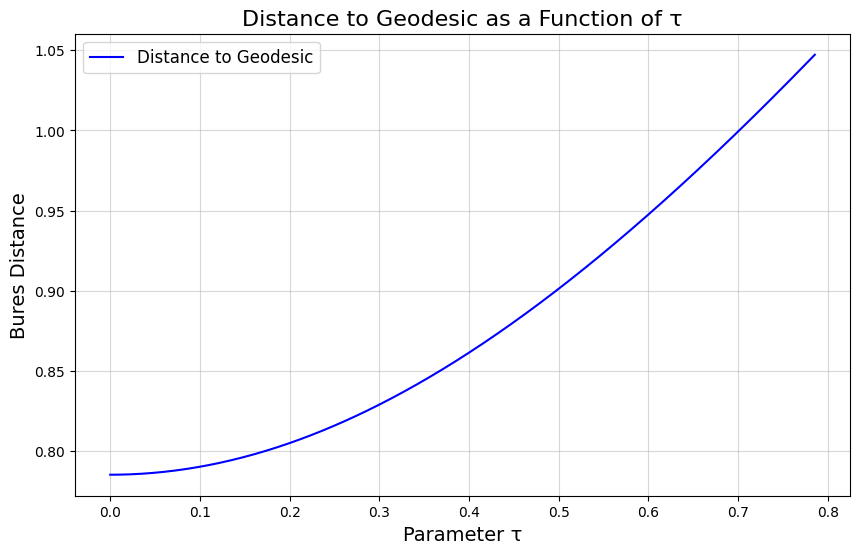

In [44]:
import matplotlib.pyplot as plt

# Plot the distances with respect to the geodesic
plt.figure(figsize=(10, 6))
plt.plot(tau_values, geodesic_pluszero_distances, label='Distance to Geodesic', color='blue')

# Add labels and title
plt.xlabel('Parameter τ', fontsize=14)
plt.ylabel('Bures Distance', fontsize=14)
plt.title('Distance to Geodesic as a Function of τ', fontsize=16)

# Add grid and legend
plt.grid(alpha=0.5)
plt.legend(fontsize=12)

# Show the plot
plt.show()

# Part 2: Compare it with qiskit backends

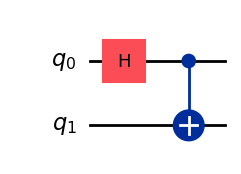

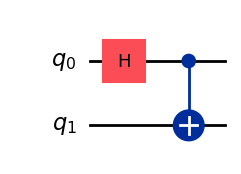

In [28]:
#okay, lets try now how it is implemented in a real quantum computer
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
 
# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
qc.cx(0, 1)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
#qc.cx(0, 1)
 
# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.

qc.draw('mpl')

In [29]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
service = QiskitRuntimeService()
 
backend = service.least_busy(simulator=False, operational=True)

print(f'Using backend: {backend.name}')


Using backend: ibm_sherbrooke


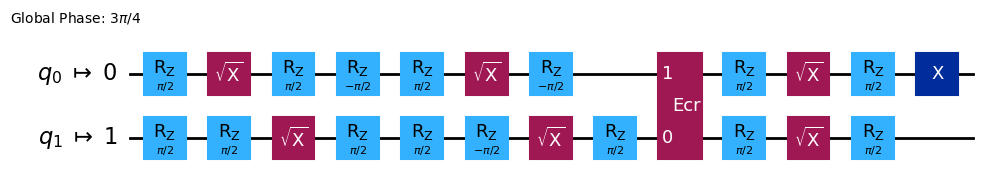

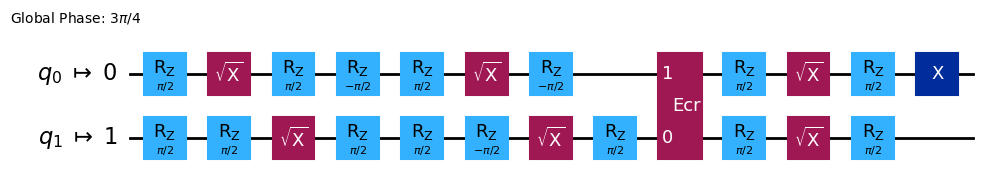

In [30]:

# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=0)
isa_circuit = pm.run(qc)
 
isa_circuit.draw("mpl", idle_wires=False)


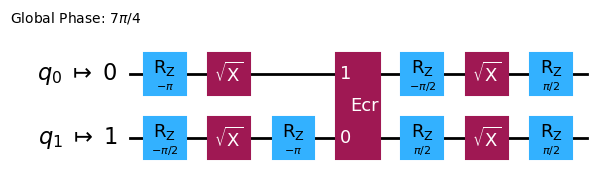

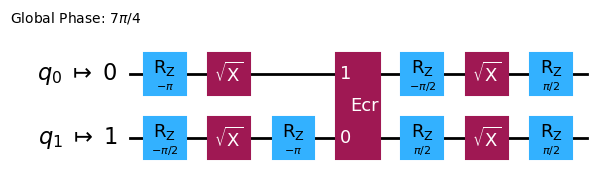

In [31]:

# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
 
isa_circuit.draw("mpl", idle_wires=False)

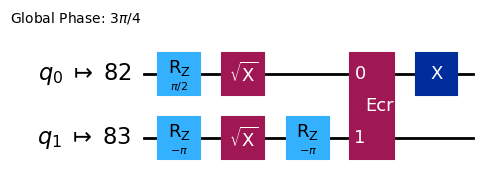

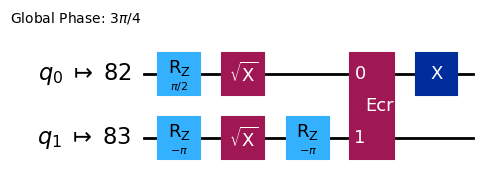

In [32]:

# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=2)
isa_circuit = pm.run(qc)
 
isa_circuit.draw("mpl", idle_wires=False)

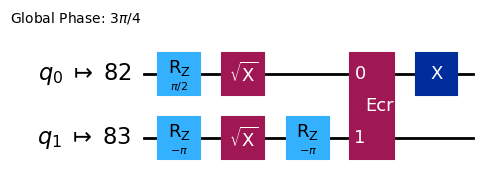

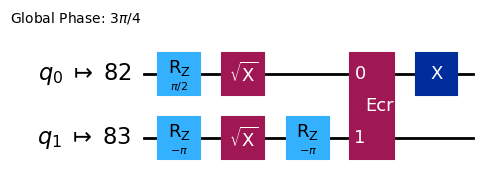

In [33]:

# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_circuit = pm.run(qc)
 
isa_circuit.draw("mpl", idle_wires=False)

In [34]:
for element in isa_circuit.data:
    print(element.matrix)




[[0.70710678-0.70710678j 0.        +0.j        ]
 [0.        +0.j         0.70710678+0.70710678j]]
[[0.5+0.5j 0.5-0.5j]
 [0.5-0.5j 0.5+0.5j]]
[[6.123234e-17+1.j 0.000000e+00+0.j]
 [0.000000e+00+0.j 6.123234e-17-1.j]]
[[0.5+0.5j 0.5-0.5j]
 [0.5-0.5j 0.5+0.5j]]
[[6.123234e-17+1.j 0.000000e+00+0.j]
 [0.000000e+00+0.j 6.123234e-17-1.j]]
[[0.        +0.j         0.70710678+0.j         0.        +0.j
  0.        +0.70710678j]
 [0.70710678+0.j         0.        +0.j         0.        -0.70710678j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.70710678j 0.        +0.j
  0.70710678+0.j        ]
 [0.        -0.70710678j 0.        +0.j         0.70710678+0.j
  0.        +0.j        ]]
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]
